# SIRV Model

## Importing Libaries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading the headers

In [3]:
#Reads the header of the csv file but first skipping the first 5 rows because the data does not start from there.
df = pd.read_csv('population_data.csv', skiprows=5, encoding='latin1')
print(df.head())

   Area code          Area name Area type Population 2011 Population 2021  \
0  K04000001  England and Wales  National      56,075,912      59,597,542   
1  E92000001            England   Country      53,012,456      56,490,048   
2  W92000004              Wales   Country       3,063,456       3,107,494   
3  E12000001         North East    Region       2,596,886       2,647,013   
4  E12000002         North West    Region       7,052,177       7,417,397   

   Percentage change  
0                6.3  
1                6.6  
2                1.4  
3                1.9  
4                5.2  


## Get population from CSV

In [4]:
my_loc_area = 'Barking and Dagenham'
#gets extracts the population for Barking and Dagenham and stores it.
pop_init = df.loc[df['Area name'] == my_loc_area, 'Population 2021'].iloc[0]
#because the number has a comma, it is removed in order to be converted and used as an integer.
pop = int(pop_init.replace(',', ''))
print(f"Population for {my_loc_area} = {pop}")

Population for Barking and Dagenham = 218869


## Initialising the values for the SIRV model

In [6]:
N = pop #total numper of people being observed
I0 = 1 # starting with one infected person
R0 = 0 # No recovered person yet
V0 = 0 # No vaccinated person yet
S0 = N - (I0 + R0 + V0 )# Total number of susceptible persons

i = 0.3 #infection rate
r = 0.1 #recovery rate
v = 0.0 #vaccination rate
days = 160 #number of days being observed

## Function to carry out SIRV simulation

In [7]:
def sirv_sim(N, I0, R0, V0, i, r, v, days):
    #creating an array of length days filled with zeros which will get get updated 
    S = np.zeros(days)
    R = np.zeros(days)
    I = np.zeros(days)
    V = np.zeros(days)

    #putting the initialised values into the array
    S[0] = S0
    V[0] = V0
    I[0] = I0
    R[0] = R0

    #loops through each day after the preset initial day
    for t in range(1, days):
        dS = -i * S[t-1] * I[t-1] / N - v * S[t-1] # change in susceptible is reduced by infection rate and vaccination rate
        dI = i * S[t-1] * I[t-1] /N - r * I[t-1]# change in infected is reduced by recovery rate but increased by infection rate
        dR = r * I[t-1] #change in recovery is only increased by rate of recovery
        dV = v * S[t-1] #change in vaccinated is on increased by rate of vaccination

        #adding the calculated changes and updateing the values each day
        S[t] = S[t-1] + dS
        V[t] = V[t-1] + dV
        R[t] = R[t-1] + dR
        I[t] = I[t-1] + dI

    return S, I, R, V

### Run Model

In [8]:
S, I, R, V = sirv_sim(N, I0, R0, V0, i, r, v, days)
#ran with no vaccination rate added yet

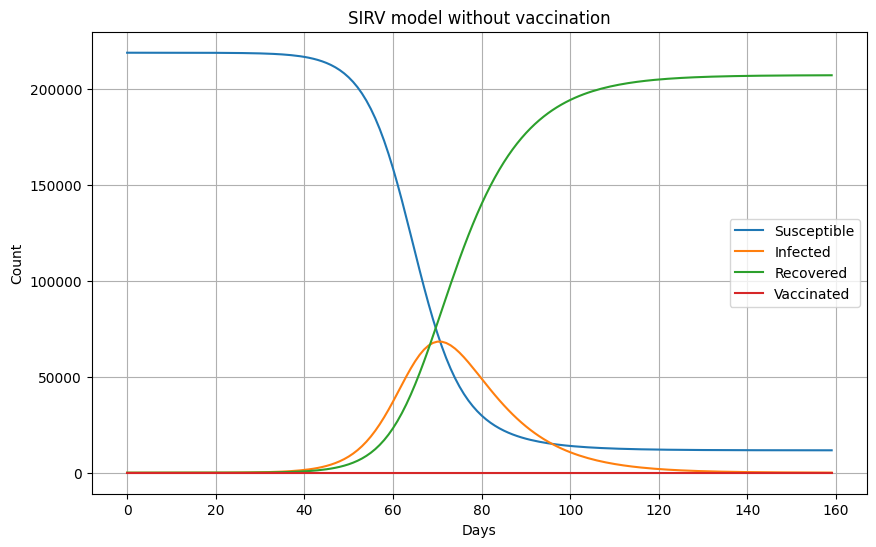

In [9]:
days_arr = np.arange(days)
plt.figure(figsize=(10,6))
plt.plot(days_arr, S, label='Susceptible')
plt.plot(days_arr, I, label='Infected')
plt.plot(days_arr, R, label='Recovered')
plt.plot(days_arr, V, label='Vaccinated')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('SIRV model without vaccination')
plt.legend()
plt.grid(True)
plt.show()

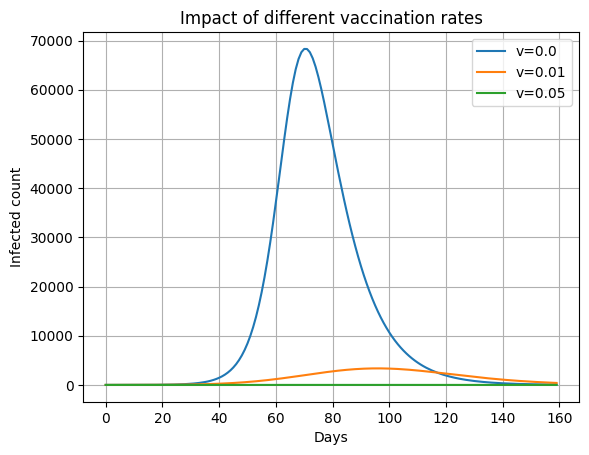

In [10]:
#now added different vaccination rate to see what different each would make in preventing an epidemic
for v in [0.0, 0.01, 0.05]:
    S2, I2, R2, V2 = sirv_sim(N, I0, R0, V0, i, r, v, days)
    plt.plot(days_arr, I2, label=f'v={v}')
plt.xlabel('Days')
plt.ylabel('Infected count')
plt.title('Impact of different vaccination rates')
plt.legend()
plt.grid(True)
plt.show()

### Find best vaccination rate

In [11]:
# function that takes the test vaccination rate and returns the peak number of infected people
def peak_infected_for_v(v_val):
    _, I3, _, _ = sirv_sim(N, I0, R0, V0, i, r, v_val, days)
    return I3.max()

#inputs the test vaccine rate ranging 0 to 0.20 and prints the corresponding peak infected.
candidates = np.linspace(0, 0.2, 21)
peaks = [(v_val, peak_infected_for_v(v_val)) for v_val in candidates]
print("v, peak infected:", peaks)

v, peak infected: [(np.float64(0.0), np.float64(68300.84177075388)), (np.float64(0.01), np.float64(3362.2261674368547)), (np.float64(0.02), np.float64(73.69193070866183)), (np.float64(0.03), np.float64(17.90800468162483)), (np.float64(0.04), np.float64(8.81621534388723)), (np.float64(0.05), np.float64(5.764152549833609)), (np.float64(0.06), np.float64(4.340577704706789)), (np.float64(0.07), np.float64(3.544115898387959)), (np.float64(0.08), np.float64(3.0451248884466815)), (np.float64(0.09), np.float64(2.7070995006925807)), (np.float64(0.1), np.float64(2.463488442152121)), (np.float64(0.11), np.float64(2.280518136107465)), (np.float64(0.12), np.float64(2.1385142096044985)), (np.float64(0.13), np.float64(2.023378067527055)), (np.float64(0.14), np.float64(1.9326352909342233)), (np.float64(0.15), np.float64(1.8559601354329223)), (np.float64(0.16), np.float64(1.791970560775523)), (np.float64(0.17), np.float64(1.735269642945538)), (np.float64(0.18), np.float64(1.690456253321549)), (np.float

## Optimal SIVR model scenario

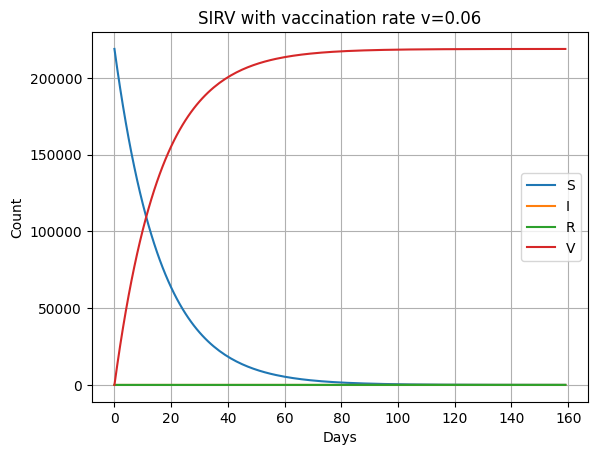

In [12]:
best_v = 0.06 #picked the best vaccination rate from the tested candidates 

#plotting a full graph 
S4, I4, R4, V4 = sirv_sim(N, I0, R0, V0, i, r, best_v, days)
plt.plot(days_arr, S4, label='S')
plt.plot(days_arr, I4, label='I')
plt.plot(days_arr, R4, label='R')
plt.plot(days_arr, V4, label='V')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title(f'SIRV with vaccination rate v={best_v}')
plt.legend()
plt.grid(True)
plt.show()

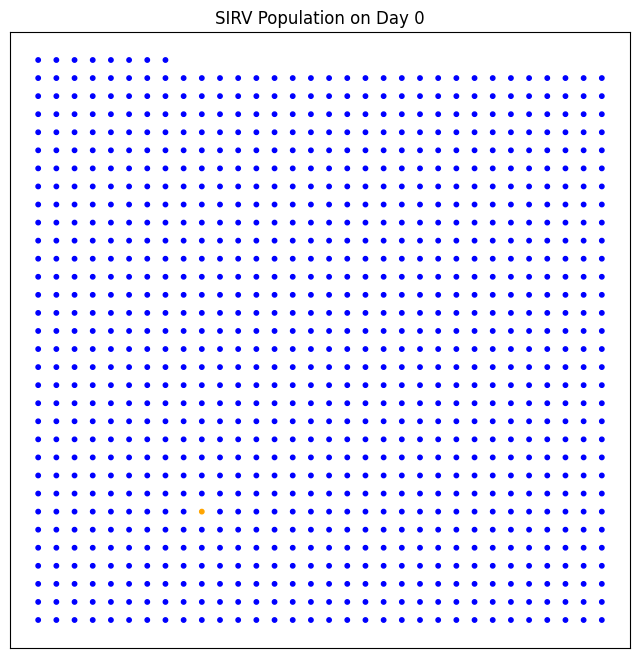

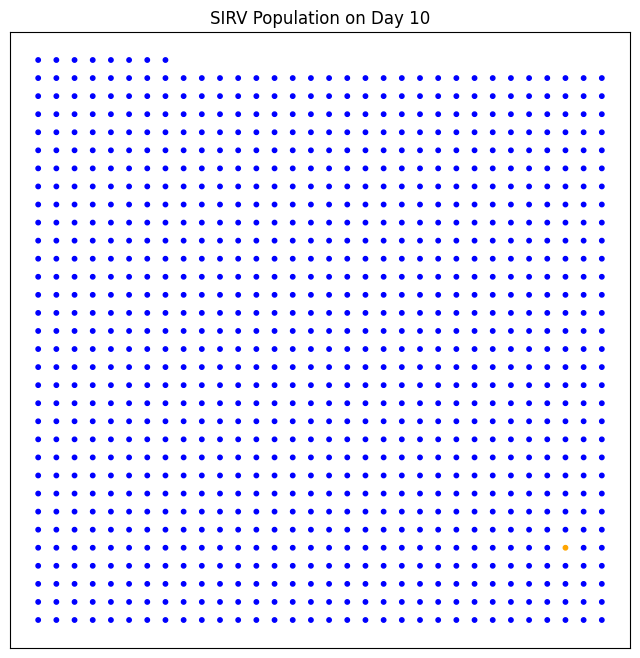

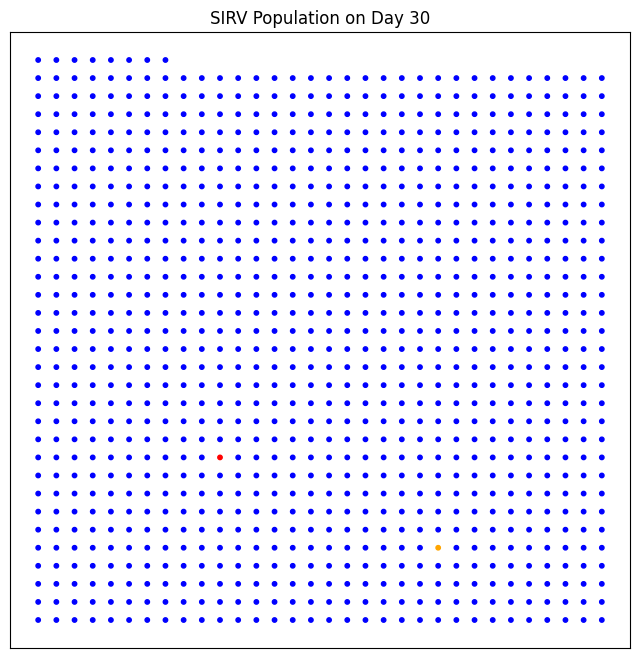

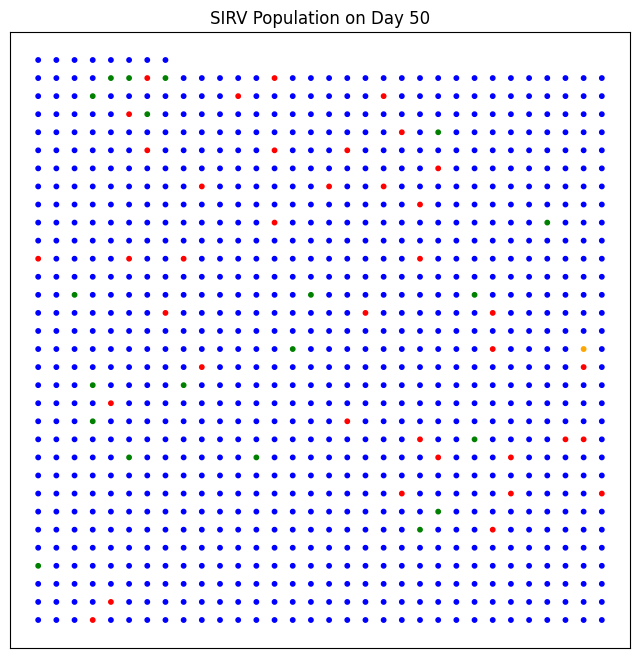

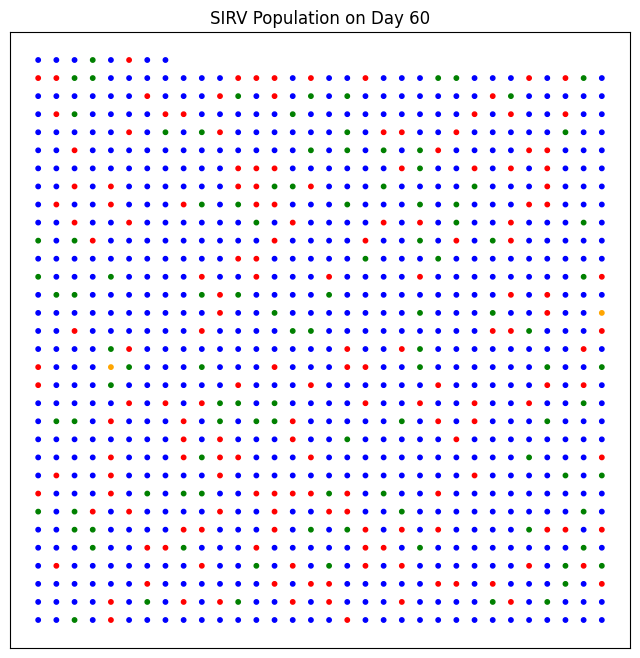

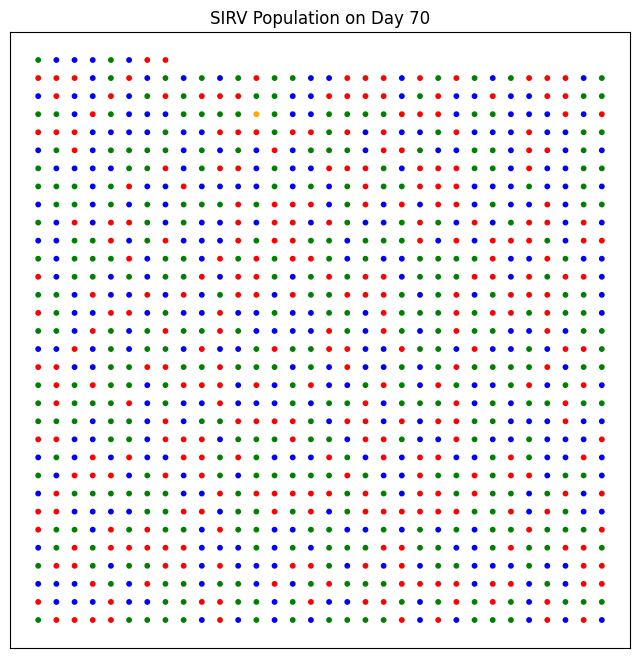

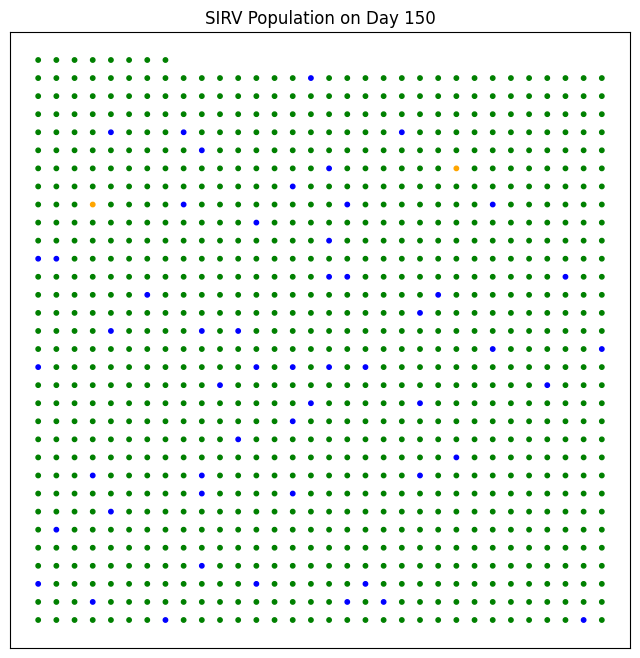

In [13]:
days_to_plot = [0, 10, 30, 50, 60, 70, 150]  # key days
colors = ['blue', 'red', 'green', 'orange']  # S, I, R, V
N_plot = 1000
grid_size = int(np.ceil(np.sqrt(N_plot)))  # make a square grid

for day in days_to_plot:
    S_scaled = int(S[day] / N * N_plot)
    I_scaled = int(I[day] / N * N_plot)
    R_scaled = int(R[day] / N * N_plot)
    V_scaled = N_plot - (S_scaled + I_scaled + R_scaled)

    pop = np.zeros(N_plot)
    pop[:S_scaled] = 0
    pop[S_scaled:S_scaled+I_scaled] = 1
    pop[S_scaled+I_scaled:S_scaled+I_scaled+R_scaled] = 2
    pop[S_scaled+I_scaled+R_scaled:] = 3
    np.random.shuffle(pop)

    # 2D positions
    x = np.arange(N_plot) % grid_size
    y = np.arange(N_plot) // grid_size

    plt.figure(figsize=(8,8))
    plt.scatter(x, y, c=[colors[int(p)] for p in pop], s=10)
    plt.title(f'SIRV Population on Day {day}')
    plt.xticks([])
    plt.yticks([])
    plt.show()